# Tratamiento de duplicados

## Objetivos

* Familiarizarnos con el concepto de datos duplicados.
* Aprender a identificar datos duplicados en un conjunto de datos.
* Aplicar diferentes métodos para eliminar datos duplicados.

## Introducción
El **tratamiento de duplicados** es el proceso de identificar y manejar registros repetidos en un conjunto de datos. En análisis de datos, esto es crucial para asegurar la calidad de los mismos al usarlos como insumos de modelos de Estadística y/o Aprendizaje Automático. Algunos aspectos clave de este proceso son:

* **Identificación**: Detectar filas que contienen información duplicada, lo que puede ocurrir por errores en la entrada de datos o durante la recopilación de datos.

* **Eliminación**: Quitar duplicados del conjunto de datos para evitar sesgos en el análisis. Esto se puede hacer manteniendo solo una de las filas duplicadas.

* **Consolidación**: En algunos casos, puede ser necesario combinar información de registros duplicados en un solo registro, en lugar de simplemente eliminar uno de ellos.


In [1]:
import pandas as pd

data = {
    "A": ["TeamA", "TeamB", "TeamB", "TeamC", "TeamA"],
    "B": [50, 40, 40, 30, 50],
    "C": [True, False, False, False, True]
}

df = pd.DataFrame(data)
df

,A,B,C
0,TeamA,50,True
1,TeamB,40,False
2,TeamB,40,False
3,TeamC,30,False
4,TeamA,50,True


In [2]:
# TeamB y TeamA son duplicados
# Deja los registros únicos
# Devuelve una copia, se puede usar inplace=True para que se mantengan estos cambios
df.drop_duplicates()

,A,B,C
0,TeamA,50,True
1,TeamB,40,False
3,TeamC,30,False


In [3]:
data = {
    "A": ["TeamA", "TeamB", "TeamB", "TeamC", "TeamA"],
    "B": [50, 40, 40, 30, 60],
    "C": [True, False, False, False, True]
}
df1 = pd.DataFrame(data)
df1

,A,B,C
0,TeamA,50,True
1,TeamB,40,False
2,TeamB,40,False
3,TeamC,30,False
4,TeamA,60,True


In [4]:
# TeamA no coincide en el valor de la columna B
df1.drop_duplicates() # Basta con que un valor sea diferente para que lo conserve

,A,B,C
0,TeamA,50,True
1,TeamB,40,False
3,TeamC,30,False
4,TeamA,60,True


Parameters:

* **subset**: Subset takes a column or list of column label. It's default value is `none`. After passing columns, it will consider them only for duplicates.
* **keep**: keep is to control how to consider duplicate value. It has only three distinct value and default is `first`.
 * If `first`, it considers first value as unique and rest of the same values as duplicate.
 * If `last`, it considers last value as unique and rest of the same values as duplicate.
 * If `False`, it consider all of the same values as duplicates
* **inplace**: Boolean values, removes rows with duplicates if `True`.

In [5]:
# Conserve la última incidencia
df.drop_duplicates(keep='last')

,A,B,C
2,TeamB,40,False
3,TeamC,30,False
4,TeamA,50,True


In [6]:
# Deja registros únicos
df.drop_duplicates(keep=False)

,A,B,C
3,TeamC,30,False


In [7]:
df1

,A,B,C
0,TeamA,50,True
1,TeamB,40,False
2,TeamB,40,False
3,TeamC,30,False
4,TeamA,60,True


In [8]:
# Subset: para tomar en cuenta solamente estas columnas
df1.drop_duplicates(subset=['A','C'])

,A,B,C
0,TeamA,50,True
1,TeamB,40,False
3,TeamC,30,False


## Actividades
### **Actividad 1**: Identificar datos duplicados

En esta actividad, los estudiantes aprenderán a identificar datos duplicados en un conjunto de datos. Para ello, podrán utilizar la función `duplicated()` de pandas.

### Pasos

1. Importar el conjunto de datos: [employees](https://drive.google.com/file/d/1QKy9BSko0Ynshpf_Q1tkHr9xhk3RF4Xw/view?usp=drive_link).
2. Utilizar la función `duplicated()` para identificar los datos duplicados.
3. Visualizar los datos duplicados.

In [ ]:
emp = pd.read_csv('./Data/employees.csv')
emp.info()

FileNotFoundError: [Errno 2] No such file or directory: 'employees.csv'

In [ ]:
emp.sample(8)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
627,Anne,Female,11/21/1984,12:30 PM,128305,16.636,False,Marketing
923,Irene,NaN,2/28/1991,10:23 PM,135369,4.380,False,Business Development
366,Jennifer,NaN,1/24/1989,8:38 PM,58520,16.231,True,Client Services
667,Douglas,NaN,2/4/2009,2:03 AM,104496,14.771,True,Marketing
464,Lawrence,Male,5/13/2005,1:25 AM,74640,18.641,False,Marketing
86,Annie,NaN,9/29/2007,12:11 AM,103495,17.290,True,Business Development
143,Teresa,NaN,1/28/2016,10:55 AM,140013,8.689,True,Engineering
348,Philip,Male,8/2/1989,11:21 AM,129968,19.897,False,Finance


In [ ]:
# Cambio de tipo de dato a datetime
emp['Start Date'] = pd.to_datetime(emp['Start Date'])

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
emp.duplicated().sum()
# No hay filas con todos los valores repetidos!

0

In [ ]:
# Si hay empleados con el mismo nombre
emp.duplicated(subset=['First Name']).sum()

799

In [ ]:
# Desplegar datos duplicados según First Name
emp[emp.duplicated(subset=['First Name'])]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
23,NaN,Male,2012-06-14,4:19 PM,125792,5.042,NaN,NaN
25,NaN,Male,2012-10-08,1:12 AM,37076,18.576,NaN,Client Services
32,NaN,Male,1998-08-21,2:27 PM,122340,6.417,NaN,NaN
34,Jerry,Male,2004-01-10,12:56 PM,95734,19.096,False,Client Services
39,NaN,Male,2016-01-29,2:33 AM,122173,7.797,NaN,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,12:39 PM,96914,1.421,False,Product
998,Larry,Male,2013-04-20,4:45 PM,60500,11.985,False,Business Development


In [ ]:
# Desplegar datos duplicados según First Name y Start Date
emp[emp.duplicated(subset=['First Name', 'Start Date'])]
# No hay registros duplicados con mismo nombre y fecha de inicio. Será?????

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team


## Ordenar valores

In [ ]:
emp.sort_values(by=['First Name', 'Start Date'], inplace=True)
emp.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
937,Aaron,NaN,1986-01-22,7:39 PM,63126,18.424,False,Client Services
440,Aaron,Male,1990-07-22,2:53 PM,52119,11.343,True,Client Services
327,Aaron,Male,1994-01-29,6:48 PM,58755,5.097,True,Marketing
101,Aaron,Male,2012-02-17,10:20 AM,61602,11.849,True,Marketing
141,Adam,Male,1990-12-24,8:57 PM,110194,14.727,True,Product


In [ ]:
# Volvemos a revisar la existencia de duplicados
emp[emp.duplicated(subset=['First Name', 'Start Date'])]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team


In [ ]:
# Criterio: última fecha de cargo de cada empleado
emp.drop_duplicates(subset=['First Name'], keep='last')

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
101,Aaron,Male,2012-02-17,10:20 AM,61602,11.849,True,Marketing
137,Adam,Male,2011-05-21,1:45 AM,95327,15.120,False,Distribution
53,Alan,NaN,2014-03-03,1:28 PM,40341,17.578,True,Finance
999,Albert,Male,2012-05-15,6:24 PM,129949,10.169,True,Sales
684,Alice,Female,2016-01-21,5:07 PM,117787,10.485,False,NaN
...,...,...,...,...,...,...,...,...
433,Wanda,Female,2008-07-20,1:44 PM,65362,7.132,True,Legal
177,Wayne,Male,2012-04-07,8:00 AM,102652,14.085,True,Distribution
127,William,Male,2002-09-29,4:09 PM,66521,5.830,False,Human Resources
652,Willie,Male,2009-12-05,5:39 AM,141932,1.017,True,Engineering


In [ ]:
# Criterio: última fecha de cargo de cada empleado en cada área
emp.drop_duplicates(subset=['First Name', 'Team'], keep='last')

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
440,Aaron,Male,1990-07-22,2:53 PM,52119,11.343,True,Client Services
101,Aaron,Male,2012-02-17,10:20 AM,61602,11.849,True,Marketing
141,Adam,Male,1990-12-24,8:57 PM,110194,14.727,True,Product
538,Adam,Male,2010-10-08,9:53 PM,45181,3.491,False,Human Resources
137,Adam,Male,2011-05-21,1:45 AM,95327,15.120,False,Distribution
...,...,...,...,...,...,...,...,...
481,NaN,Female,2013-04-27,6:40 AM,93847,1.085,NaN,Business Development
165,NaN,Female,2014-03-23,1:28 PM,59148,9.061,NaN,Legal
890,NaN,Male,2015-11-24,3:11 AM,145329,7.100,NaN,Finance
39,NaN,Male,2016-01-29,2:33 AM,122173,7.797,NaN,Client Services


## Actividad 2: Aplicar diferentes métodos para eliminar datos duplicados

En esta actividad, los estudiantes aplicarán diferentes métodos para eliminar datos duplicados de un conjunto de datos. Para ello, podrán utilizar los métodos de la actividad anterior.

Pasos
1. Importar el conjunto de [datos](https://drive.google.com/file/d/1Mi5puM60BmbEqOFW-4iGKbm43d3MY_KU/view?usp=drive_link).
2. Aplicar métodos de eliminación de datos duplicados para visualizar datos de **última consulta de pacientes**.

In [ ]:
estudios = pd.read_csv('estudios.csv')
estudios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39205 entries, 0 to 39204
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dob                         39205 non-null  object 
 1   LMP                         39205 non-null  object 
 2   Longitud de cuello uterino  35011 non-null  float64
 3   DBP                         13487 non-null  float64
 4   PC                          13348 non-null  float64
 5   PA                          13322 non-null  float64
 6   Femur                       13334 non-null  float64
 7   Humero                      3378 non-null   float64
 8   IP art uterina der          34420 non-null  float64
 9   IP art uterina izq          34407 non-null  float64
 10  PFE                         13259 non-null  float64
 11  Peso                        37824 non-null  float64
 12  Para                        33162 non-null  float64
 13  FCF                         337



*   dob: Date of Birthday
*   LMP: Last Menstruation Period
*   EG: Edad Gestacional (al nacer)



In [ ]:
estudios.sample(10)

,dob,LMP,Longitud de cuello uterino,DBP,PC,PA,Femur,Humero,IP art uterina der,IP art uterina izq,PFE,Peso,Para,FCF,TN,IP Istmico Aortico,Fecha examen,LCC,Apellidos,EG
18998,20/09/2001,26/08/2020,35.8,NaN,NaN,NaN,NaN,NaN,1.78,1.91,NaN,55.00,0.0,156.0,1.6,NaN,20/11/2020,57.0,Torres Segura,12.2
35731,29/04/2003,15/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.95,0.0,NaN,NaN,NaN,08/01/2020,NaN,REMIGIO VALADEZ,16.3
19159,13/11/1997,21/07/2020,36.0,79.6,289.0,282.0,57.6,NaN,0.54,0.63,1798.0,76.50,0.0,148.0,NaN,NaN,02/03/2021,NaN,Sanchez Rios,32.0
14830,16/08/1991,06/04/2014,34.0,85.0,313.0,305.0,66.0,NaN,0.61,0.72,2423.0,81.00,0.0,NaN,NaN,NaN,04/12/2014,NaN,Arenas Cisneros,34.4
27361,02/09/2001,09/10/2016,36.2,26.3,96.9,78.2,15.1,13.5,1.61,1.72,96.0,55.20,0.0,NaN,NaN,NaN,18/01/2017,87.6,RIZO LOPEZ,14.3
22170,25/10/1986,05/02/2017,32.3,NaN,NaN,NaN,NaN,NaN,1.03,1.19,NaN,69.50,1.0,145.0,1.9,NaN,12/05/2017,78.7,DE ANDA CARLIN,13.5
15975,09/05/1987,29/11/2015,33.0,83.0,296.0,297.0,61.6,NaN,0.70,0.99,2121.0,80.00,0.0,161.0,NaN,NaN,21/07/2016,NaN,ANDRADE GOMEZ,33.4
18059,16/07/2017,28/12/2016,40.0,NaN,NaN,NaN,NaN,NaN,1.70,1.32,NaN,55.00,0.0,151.0,1.7,NaN,27/03/2017,61.0,JUAREZ SANCHEZ BOMBELA,12.5
34287,28/12/1991,20/08/2018,35.0,80.4,292.0,279.1,65.4,NaN,0.62,0.65,2014.0,66.15,1.0,161.0,NaN,NaN,04/04/2019,NaN,VARGAS SERRANO,32.3
20074,//nan,//nan,39.0,82.5,295.0,284.0,55.6,51.6,0.86,0.90,1759.0,73.50,NaN,157.0,NaN,NaN,03/10/2018,NaN,NaN,0.0


In [ ]:
# Convertir a datetime
estudios['dob'] = pd.to_datetime(estudios['dob'], dayfirst=True, errors='coerce') # Date of Birth
estudios['LMP'] = pd.to_datetime(estudios['LMP'], dayfirst=True, errors='coerce') # Last Menstruation Period
estudios['Fecha examen'] = pd.to_datetime(estudios['Fecha examen'], dayfirst=True, errors='coerce')
estudios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39205 entries, 0 to 39204
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   dob                         33413 non-null  datetime64[ns]
 1   LMP                         33324 non-null  datetime64[ns]
 2   Longitud de cuello uterino  35011 non-null  float64       
 3   DBP                         13487 non-null  float64       
 4   PC                          13348 non-null  float64       
 5   PA                          13322 non-null  float64       
 6   Femur                       13334 non-null  float64       
 7   Humero                      3378 non-null   float64       
 8   IP art uterina der          34420 non-null  float64       
 9   IP art uterina izq          34407 non-null  float64       
 10  PFE                         13259 non-null  float64       
 11  Peso                        37824 non-null  float64   

In [ ]:
# Contamos 1200 duplicados
estudios.duplicated().sum()

1200

In [ ]:
# Ordenamos
estudios.sort_values(by=['Apellidos', 'dob', 'Fecha examen'],
                     ascending=[True, False, False],
                     inplace=True)
# Apellidos: asc
# Fecha nac: desc
# Fec examen: desc

In [ ]:
# Hay pacientes con examenes duplicados?
estudios.duplicated(subset=['Apellidos', 'dob','Fecha examen']).sum()

6349

In [ ]:
# visualizar
estudios[estudios.duplicated(subset=['Apellidos', 'dob'])][['Apellidos','dob','Fecha examen']]

,Apellidos,dob,Fecha examen
25525,ALABA LOPEZ,1990-03-30,2018-10-22
26045,ALABA LOPEZ,1990-03-30,2018-10-22
33712,ANA KARINA,1988-03-09,2016-03-22
25967,AVIÑA,1983-04-09,2019-10-22
13907,Aranda Guerrero,1992-08-18,2015-10-28
...,...,...,...
37112,NaN,NaT,NaT
37315,NaN,NaT,NaT
37329,NaN,NaT,NaT
37363,NaN,NaT,NaT


In [ ]:
# Implementar estrategia de eliminacion de duplicados
# para conserva los registros de la última consulta
estudios.drop_duplicates(subset=['Apellidos', 'dob'], keep='first', inplace=True)
estudios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23716 entries, 32391 to 23655
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   dob                         23605 non-null  datetime64[ns]
 1   LMP                         23623 non-null  datetime64[ns]
 2   Longitud de cuello uterino  21400 non-null  float64       
 3   DBP                         9276 non-null   float64       
 4   PC                          9181 non-null   float64       
 5   PA                          9162 non-null   float64       
 6   Femur                       9164 non-null   float64       
 7   Humero                      1828 non-null   float64       
 8   IP art uterina der          21244 non-null  float64       
 9   IP art uterina izq          21234 non-null  float64       
 10  PFE                         9060 non-null   float64       
 11  Peso                        23177 non-null  float64    

In [10]:
emp = pd.read_csv("./Data/employees.csv")
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [ ]:
emp["Start Date"] = pd.to_datetime(emp["Start Date"])

In [12]:
emp.duplicated().sum()

0

In [16]:
# visualizar aquellos registros marcados como duplicados
emp[emp.duplicated(subset=["First Name"])].head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
23,NaN,Male,2012-06-14,4:19 PM,125792,5.042,NaN,NaN
25,NaN,Male,2012-10-08,1:12 AM,37076,18.576,NaN,Client Services
32,NaN,Male,1998-08-21,2:27 PM,122340,6.417,NaN,NaN
34,Jerry,Male,2004-01-10,12:56 PM,95734,19.096,False,Client Services
39,NaN,Male,2016-01-29,2:33 AM,122173,7.797,NaN,Client Services


In [17]:
emp[emp.duplicated(subset=["First Name", "Start Date"])].head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team


`sort_values()`: Ordena los valores de un DataFrame en base a una o más columnas.


In [20]:
emp.sort_values(by=["First Name", "Start Date"], inplace=True)
emp.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
937,Aaron,NaN,1986-01-22,7:39 PM,63126,18.424,False,Client Services
440,Aaron,Male,1990-07-22,2:53 PM,52119,11.343,True,Client Services
327,Aaron,Male,1994-01-29,6:48 PM,58755,5.097,True,Marketing
101,Aaron,Male,2012-02-17,10:20 AM,61602,11.849,True,Marketing
141,Adam,Male,1990-12-24,8:57 PM,110194,14.727,True,Product


<Axes: >

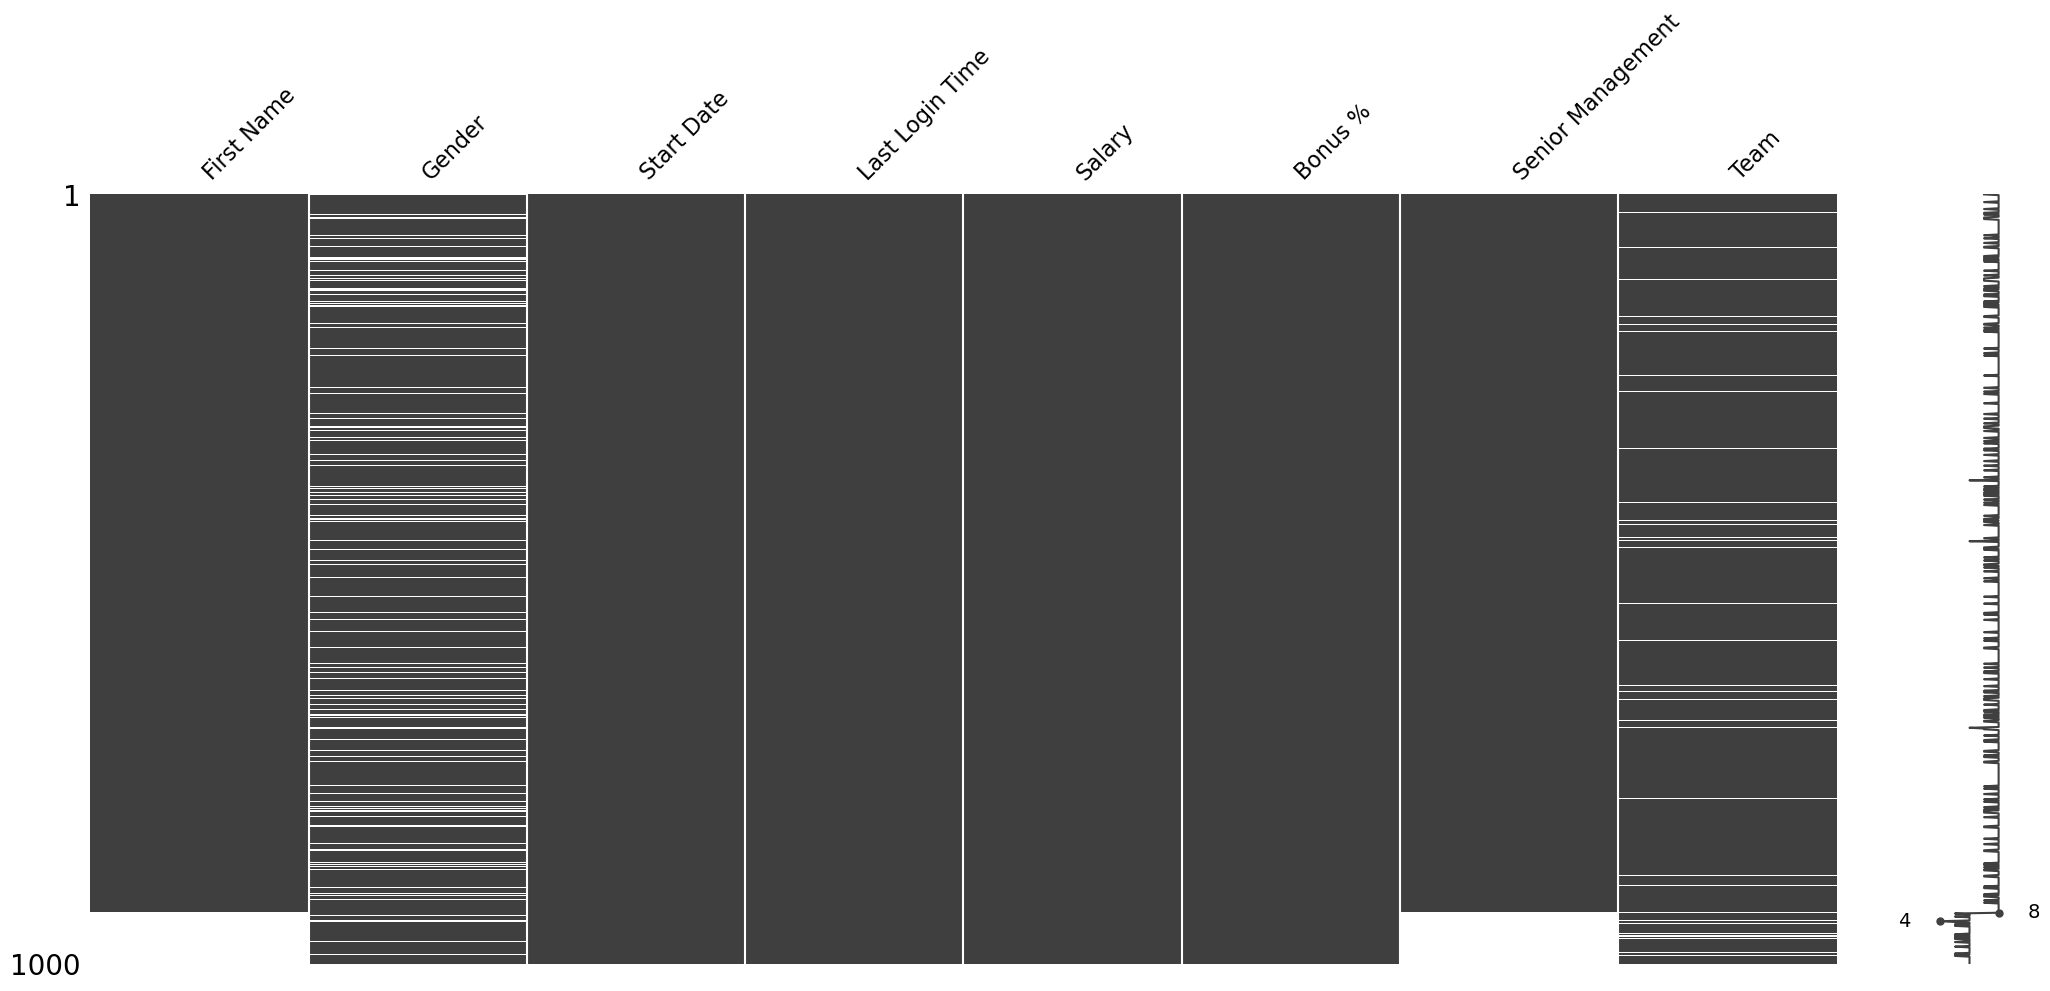

In [21]:
import missingno as msno
msno.matrix(emp)

<Axes: >

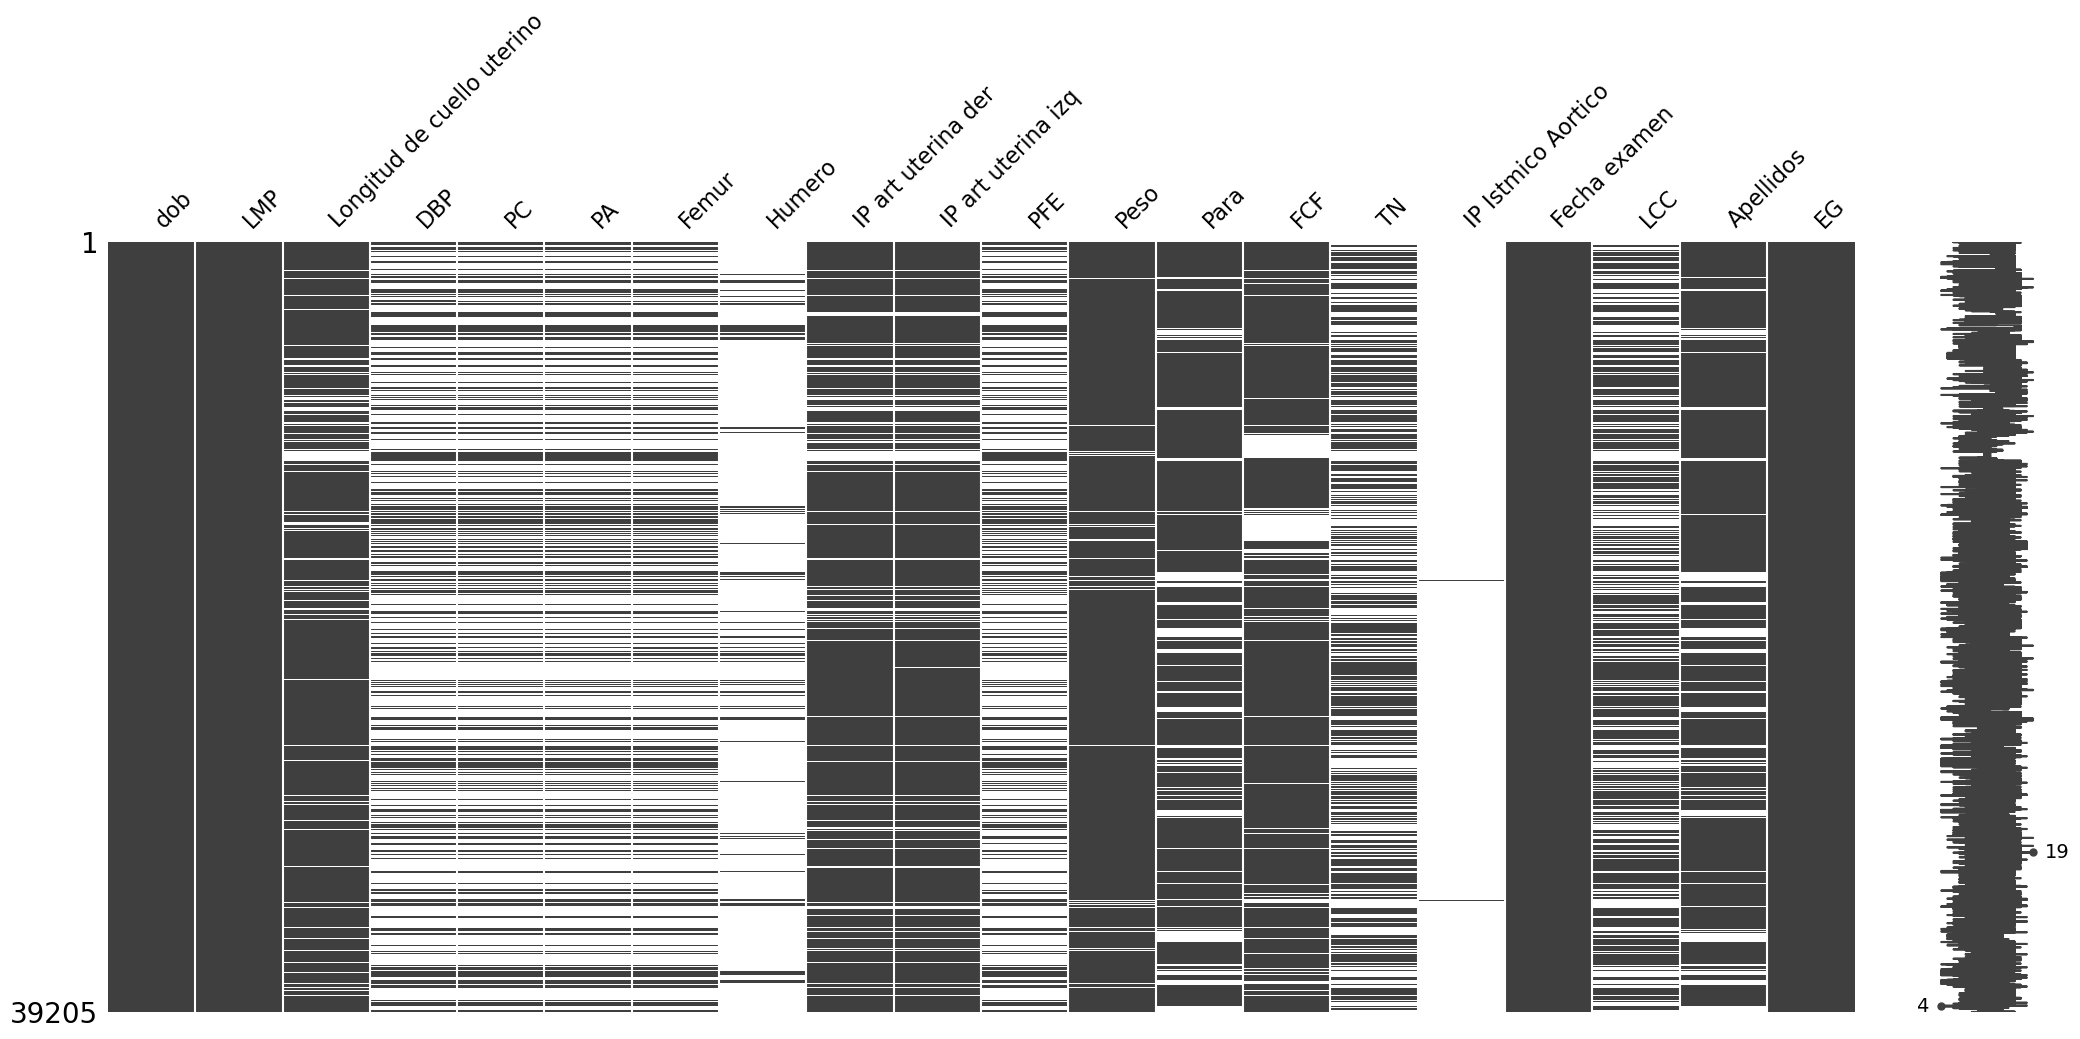

In [24]:
estudios = pd.read_csv("./Data/estudios.csv")
msno.matrix(estudios)

In [25]:
estudios.sample(10)

,dob,LMP,Longitud de cuello uterino,DBP,PC,PA,Femur,Humero,IP art uterina der,IP art uterina izq,PFE,Peso,Para,FCF,TN,IP Istmico Aortico,Fecha examen,LCC,Apellidos,EG
2894,04/04/1995,09/07/2015,21.9,85.7,306.3,289.0,63.8,NaN,0.71,0.73,2140.0,53.8,0.0,139.0,NaN,NaN,23/02/2016,NaN,GOMEZ MARES,32.5
2087,13/08/1987,18/01/2017,45.5,NaN,NaN,NaN,NaN,NaN,0.71,1.24,NaN,75.5,2.0,156.0,2.40,NaN,26/04/2017,81.9,CRUZ ROCHA,14.0
37009,06/10/1999,24/01/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.2,0.0,160.0,NaN,NaN,11/04/2017,41.3,MUÑOZ LOPEZ desconocido,11.0
12581,21/06/1998,15/09/2018,43.8,NaN,NaN,NaN,NaN,NaN,1.91,1.72,NaN,52.2,0.0,170.0,1.20,NaN,06/12/2018,50.0,Contreras Perez,11.5
21288,14/02/1997,27/12/2019,30.4,NaN,NaN,NaN,NaN,NaN,1.36,1.39,NaN,85.1,0.0,152.0,1.64,NaN,20/03/2020,54.0,ESTRADA LOZANO,12.0
1266,19/01/1984,15/11/2018,31.1,NaN,NaN,NaN,NaN,NaN,0.73,0.71,NaN,60.2,0.0,159.0,1.60,NaN,12/02/2019,64.0,CHAGOLLA MARTINEZ,12.5
3930,17/01/1996,23/06/2016,40.5,NaN,NaN,NaN,NaN,NaN,1.61,1.08,NaN,46.8,0.0,152.0,1.50,NaN,19/09/2016,61.3,PRADO ESPARZA,12.4
17543,//nan,//nan,32.0,84.5,299.0,287.0,60.6,NaN,1.07,0.54,2000.0,69.5,NaN,136.0,NaN,NaN,29/03/2017,NaN,NaN,0.0
33520,01/04/1998,28/07/2015,31.6,83.8,303.1,286.2,61.1,51.2,0.82,0.79,2002.0,96.5,0.0,135.0,NaN,NaN,18/03/2016,NaN,GARCIA HERNANDEZ,33.3
26249,10/10/1994,14/05/2018,38.7,NaN,NaN,NaN,NaN,NaN,1.29,1.26,NaN,62.7,0.0,165.0,2.00,NaN,17/08/2018,74.5,GAZCA CASTRO,13.4
